# Preliminary Data Exploration of Zillow Dataset
Purpose
This notebook performs some preliminary data exploration of the Zillow academic dataset in preparation for use of the data in the final group project.

* Delete unneeded columns
* Find and drop null values
* find number of zipcodes per state
* averaging housing prices for Years 2016, 2017, 2018, 2019 and 2021
* Change "RegionName" to "postal_code" to match Yelp dataset
* Export cleaned dataframe as csv

Data Source
Data & Documentation: https://www.zillow.com/research/data/

<em>Only the data based on zipcodes: csv file was explored in this notebook</em>

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from sqlalchemy import create_engine
import psycopg2
import time

In [73]:
#load file
filepath = "zillow_zip.csv"
housing_df = pd.read_csv(filepath)

In [74]:
housing_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,323652.0,...,1090831.0,1097696.0,1101821.0,1110506.0,1119342.0,1129669.0,1134048.0,1133431.0,1133999.0,1139877.0
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,306875.0,...,499075.0,499598.0,502373.0,506116.0,510520.0,513056.0,515590.0,518330.0,520287.0,521646.0
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,494584.0,...,1437688.0,1432518.0,1430890.0,1432703.0,1446795.0,1462236.0,1470688.0,1474849.0,1475156.0,1485519.0
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,224011.0,...,373396.0,380344.0,389081.0,399801.0,410661.0,419763.0,427705.0,434772.0,440495.0,446576.0
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,399459.0,...,638052.0,638200.0,640707.0,644396.0,649329.0,652449.0,656282.0,660835.0,663698.0,665572.0


In [75]:
#print column names
housing_df.columns.to_list()

['RegionID',
 'SizeRank',
 'RegionName',
 'RegionType',
 'StateName',
 'State',
 'City',
 'Metro',
 'CountyName',
 '2000-01-31',
 '2000-02-29',
 '2000-03-31',
 '2000-04-30',
 '2000-05-31',
 '2000-06-30',
 '2000-07-31',
 '2000-08-31',
 '2000-09-30',
 '2000-10-31',
 '2000-11-30',
 '2000-12-31',
 '2001-01-31',
 '2001-02-28',
 '2001-03-31',
 '2001-04-30',
 '2001-05-31',
 '2001-06-30',
 '2001-07-31',
 '2001-08-31',
 '2001-09-30',
 '2001-10-31',
 '2001-11-30',
 '2001-12-31',
 '2002-01-31',
 '2002-02-28',
 '2002-03-31',
 '2002-04-30',
 '2002-05-31',
 '2002-06-30',
 '2002-07-31',
 '2002-08-31',
 '2002-09-30',
 '2002-10-31',
 '2002-11-30',
 '2002-12-31',
 '2003-01-31',
 '2003-02-28',
 '2003-03-31',
 '2003-04-30',
 '2003-05-31',
 '2003-06-30',
 '2003-07-31',
 '2003-08-31',
 '2003-09-30',
 '2003-10-31',
 '2003-11-30',
 '2003-12-31',
 '2004-01-31',
 '2004-02-29',
 '2004-03-31',
 '2004-04-30',
 '2004-05-31',
 '2004-06-30',
 '2004-07-31',
 '2004-08-31',
 '2004-09-30',
 '2004-10-31',
 '2004-11-30',
 

# Dropping unneeded/unnecessary columns
* columns 9 through 201 (2000-01-31 to 2015-12-31) as we are only using data from 2016
* dropping columns "RegionID", "SizeRank", "RegionType", "StateName" and "Metro"

In [76]:
#we are using only data from 2016, so we drop the columns of housing prices from 2000-2015
drop_col = housing_df.columns[9:261]
drop_col

Index(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30', '2000-05-31',
       '2000-06-30', '2000-07-31', '2000-08-31', '2000-09-30', '2000-10-31',
       ...
       '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31',
       '2020-08-31', '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31'],
      dtype='object', length=252)

In [77]:
housing_df = housing_df.drop(drop_col,  axis =1)


In [78]:
#dropping columns "RegionID", "SizeRank", "RegionType","StateName"
housing_df = housing_df.drop(columns = ["RegionID", "SizeRank", "RegionType","StateName", "Metro"], axis=1)

In [79]:
housing_df.shape

(30468, 17)

In [80]:
housing_df.head()

,RegionName,State,City,CountyName,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31
0,10025,NY,New York,New York County,1102206.0,1094738.0,1083788.0,1090831.0,1097696.0,1101821.0,1110506.0,1119342.0,1129669.0,1134048.0,1133431.0,1133999.0,1139877.0
1,60657,IL,Chicago,Cook County,495810.0,497142.0,497159.0,499075.0,499598.0,502373.0,506116.0,510520.0,513056.0,515590.0,518330.0,520287.0,521646.0
2,10023,NY,New York,New York County,1441640.0,1433175.0,1420015.0,1437688.0,1432518.0,1430890.0,1432703.0,1446795.0,1462236.0,1470688.0,1474849.0,1475156.0,1485519.0
3,77494,TX,Katy,Harris County,356897.0,361460.0,366864.0,373396.0,380344.0,389081.0,399801.0,410661.0,419763.0,427705.0,434772.0,440495.0,446576.0
4,60614,IL,Chicago,Cook County,633714.0,635301.0,635502.0,638052.0,638200.0,640707.0,644396.0,649329.0,652449.0,656282.0,660835.0,663698.0,665572.0


In [81]:
housing_df.drop(columns=["2022-01-31"], inplace=True)

In [82]:
housing_df.head()

,RegionName,State,City,CountyName,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31
0,10025,NY,New York,New York County,1102206.0,1094738.0,1083788.0,1090831.0,1097696.0,1101821.0,1110506.0,1119342.0,1129669.0,1134048.0,1133431.0,1133999.0
1,60657,IL,Chicago,Cook County,495810.0,497142.0,497159.0,499075.0,499598.0,502373.0,506116.0,510520.0,513056.0,515590.0,518330.0,520287.0
2,10023,NY,New York,New York County,1441640.0,1433175.0,1420015.0,1437688.0,1432518.0,1430890.0,1432703.0,1446795.0,1462236.0,1470688.0,1474849.0,1475156.0
3,77494,TX,Katy,Harris County,356897.0,361460.0,366864.0,373396.0,380344.0,389081.0,399801.0,410661.0,419763.0,427705.0,434772.0,440495.0
4,60614,IL,Chicago,Cook County,633714.0,635301.0,635502.0,638052.0,638200.0,640707.0,644396.0,649329.0,652449.0,656282.0,660835.0,663698.0


In [83]:
housing_df.describe()

,RegionName,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31
count,30468.000000,2.980900e+04,3.037100e+04,3.038100e+04,3.039400e+04,3.035800e+04,3.042000e+04,3.041000e+04,3.040300e+04,3.042800e+04,3.044100e+04,3.044600e+04,3.030400e+04
mean,48841.839208,2.494551e+05,2.514897e+05,2.547684e+05,2.580836e+05,2.619085e+05,2.664968e+05,2.713916e+05,2.757969e+05,2.794254e+05,2.823425e+05,2.850742e+05,2.892059e+05
std,27404.005828,2.525836e+05,2.525087e+05,2.544204e+05,2.574985e+05,2.622051e+05,2.680379e+05,2.745800e+05,2.797231e+05,2.833444e+05,2.857783e+05,2.884209e+05,2.919223e+05
min,501.000000,1.454600e+04,1.457200e+04,1.449400e+04,1.440500e+04,1.429700e+04,1.434500e+04,1.444900e+04,1.457000e+04,1.474600e+04,1.487800e+04,1.495100e+04,1.533000e+04
25%,25970.500000,1.151710e+05,1.170830e+05,1.187830e+05,1.200988e+05,1.211815e+05,1.226682e+05,1.241170e+05,1.255580e+05,1.270408e+05,1.281130e+05,1.290225e+05,1.309000e+05
50%,48413.500000,1.817360e+05,1.838080e+05,1.865710e+05,1.889155e+05,1.911555e+05,1.938355e+05,1.965230e+05,1.992570e+05,2.016020e+05,2.038140e+05,2.056995e+05,2.089830e+05
75%,71732.500000,2.937900e+05,2.964265e+05,3.007000e+05,3.050215e+05,3.101438e+05,3.159640e+05,3.221150e+05,3.280755e+05,3.325788e+05,3.367260e+05,3.408808e+05,3.460762e+05
max,99901.000000,6.666826e+06,6.666536e+06,6.618791e+06,6.675217e+06,6.797763e+06,6.990922e+06,7.142055e+06,7.280961e+06,7.398273e+06,7.479900e+06,7.542035e+06,7.589458e+06


#  Null values

In [84]:
#check for null values
for column in housing_df.columns:
    print(f"column {column} has {housing_df[column].isnull().sum()} null values")

column RegionName has 0 null values
column State has 0 null values
column City has 0 null values
column CountyName has 0 null values
column 2021-01-31 has 659 null values
column 2021-02-28 has 97 null values
column 2021-03-31 has 87 null values
column 2021-04-30 has 74 null values
column 2021-05-31 has 110 null values
column 2021-06-30 has 48 null values
column 2021-07-31 has 58 null values
column 2021-08-31 has 65 null values
column 2021-09-30 has 40 null values
column 2021-10-31 has 27 null values
column 2021-11-30 has 22 null values
column 2021-12-31 has 164 null values


### Replace null values with median value for each row

In [85]:
m = housing_df.median(axis=1)


/Users/ramyaramamurthy/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [86]:
for i, col in enumerate(housing_df):
    # using i allows for duplicate columns
    # inplace *may* not always work here, so IMO the next line is preferred
    # df.iloc[:, i].fillna(m, inplace=True)
    housing_df.iloc[:, i] = housing_df.iloc[:, i].fillna(m)

print(housing_df.isnull().sum())


RegionName    0
State         0
City          0
CountyName    0
2021-01-31    0
2021-02-28    0
2021-03-31    0
2021-04-30    0
2021-05-31    0
2021-06-30    0
2021-07-31    0
2021-08-31    0
2021-09-30    0
2021-10-31    0
2021-11-30    0
2021-12-31    0
dtype: int64


In [87]:
housing_df.shape

(30468, 16)

In [88]:
#check for duplicate zipcodes
housing_df["RegionName"].duplicated(keep='first').sum()

0

# Number of zipcodes per state

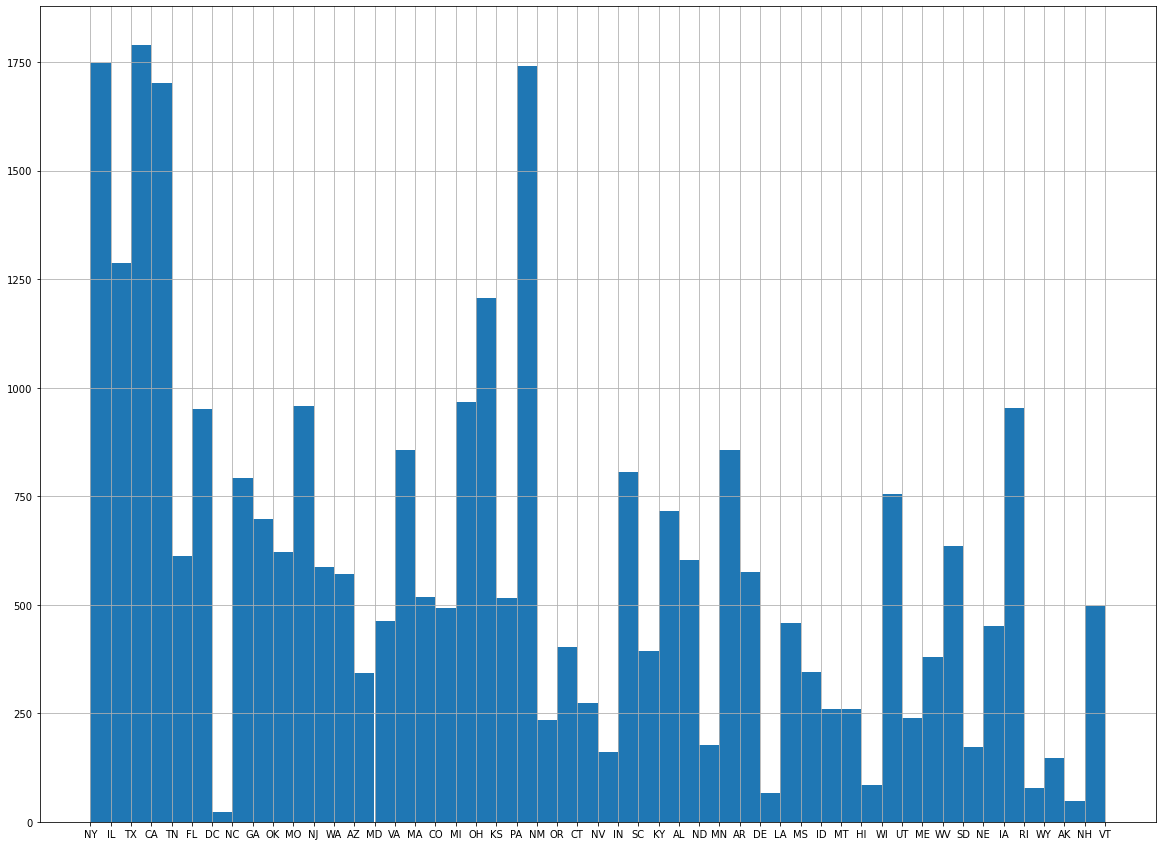

In [89]:
# number of zipcodes per state shown below 
housing_df["State"].hist(bins =50, figsize=(20,15))
plt.show()

In [90]:
housing_df["State"].unique()

array(['NY', 'IL', 'TX', 'CA', 'TN', 'FL', 'DC', 'NC', 'GA', 'OK', 'MO',
       'NJ', 'WA', 'AZ', 'MD', 'VA', 'MA', 'CO', 'MI', 'OH', 'KS', 'PA',
       'NM', 'OR', 'CT', 'NV', 'IN', 'SC', 'KY', 'AL', 'ND', 'MN', 'AR',
       'DE', 'LA', 'MS', 'ID', 'MT', 'HI', 'WI', 'UT', 'ME', 'WV', 'SD',
       'NE', 'IA', 'RI', 'WY', 'AK', 'NH', 'VT'], dtype=object)

In [91]:
housing_df["State"].value_counts()


TX    1789
NY    1747
PA    1740
CA    1703
IL    1287
OH    1207
MI     966
MO     959
IA     953
FL     951
VA     857
MN     856
IN     805
NC     791
WI     756
KY     717
GA     697
WV     635
OK     621
TN     613
AL     602
NJ     588
AR     575
WA     572
MA     518
KS     516
CO     492
MD     462
LA     457
NE     451
OR     402
SC     394
ME     380
MS     346
AZ     343
CT     274
ID     261
MT     261
VT     258
NH     240
UT     238
NM     234
ND     176
SD     173
NV     161
WY     146
HI      84
RI      77
DE      66
AK      48
DC      23
Name: State, dtype: int64

# Averaging Housing Prices 
* averaging housing prices for Years 2016, 2017, 2018, 2019 and 2021
* rounding to nearest integer
* adding the averaged values as columns 2016, 2017, 2018, 2019, 2020, 2021, 2022
* dropping columns 5 through 78 that contained the monthly housing prices. 

In [92]:
housing_df.shape[1]

16

In [93]:
i = range(5,housing_df.shape[1],12)
for iter in i:
    j = iter+12
    avg_col = housing_df.iloc[:, iter:j]
    col_name = housing_df.columns[iter]
    col_name = col_name.split('-')[0]
    housing_df[col_name] = avg_col.mean(axis=1).astype(int)


In [94]:
housing_df.head()

,RegionName,State,City,CountyName,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2021
0,10025,NY,New York,New York County,1102206.0,1094738.0,1083788.0,1090831.0,1097696.0,1101821.0,1110506.0,1119342.0,1129669.0,1134048.0,1133431.0,1133999.0,1111806
1,60657,IL,Chicago,Cook County,495810.0,497142.0,497159.0,499075.0,499598.0,502373.0,506116.0,510520.0,513056.0,515590.0,518330.0,520287.0,507204
2,10023,NY,New York,New York County,1441640.0,1433175.0,1420015.0,1437688.0,1432518.0,1430890.0,1432703.0,1446795.0,1462236.0,1470688.0,1474849.0,1475156.0,1446973
3,77494,TX,Katy,Harris County,356897.0,361460.0,366864.0,373396.0,380344.0,389081.0,399801.0,410661.0,419763.0,427705.0,434772.0,440495.0,400394
4,60614,IL,Chicago,Cook County,633714.0,635301.0,635502.0,638052.0,638200.0,640707.0,644396.0,649329.0,652449.0,656282.0,660835.0,663698.0,646795


In [97]:
# we will be using only 2021 housing prices for our analysis
col_drop = housing_df.columns[4:16]
print(col_drop)
housing_df = housing_df.drop(col_drop,  axis =1)


Index(['2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30', '2021-05-31',
       '2021-06-30', '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31',
       '2021-11-30', '2021-12-31'],
      dtype='object')


In [98]:
housing_df.head()

,RegionName,State,City,CountyName,2021
0,10025,NY,New York,New York County,1111806
1,60657,IL,Chicago,Cook County,507204
2,10023,NY,New York,New York County,1446973
3,77494,TX,Katy,Harris County,400394
4,60614,IL,Chicago,Cook County,646795


In [99]:
housing_df.shape

(30468, 5)

# Change "RegionName" to "postal_code"

In [100]:
housing_df.rename(columns = {"RegionName":"postal_code"}, inplace=True)

In [101]:
housing_df.head()

,postal_code,State,City,CountyName,2021
0,10025,NY,New York,New York County,1111806
1,60657,IL,Chicago,Cook County,507204
2,10023,NY,New York,New York County,1446973
3,77494,TX,Katy,Harris County,400394
4,60614,IL,Chicago,Cook County,646795


In [102]:
housing_df.shape

(30468, 5)

# Export data as csv

In [103]:
# Export housing_df to csv
file = "zillow_housing_final_cleaned.csv"
housing_df.to_csv(file)